In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt

In [2]:
dataset= pd.read_csv("assets/data/valve_audio_dataset.csv", header= None)
dataset.head()

,0,1,2,3,4,5
0,-439.41833,99.326840,16.212095,-5.346633,10.942266,valve_abnormal
1,-423.92290,91.317130,10.058283,15.706287,19.534492,valve_abnormal
2,-450.79654,104.705540,16.177730,-1.854793,6.112635,valve_abnormal
3,-425.34204,107.225914,12.397039,13.569935,12.656543,valve_abnormal
4,-445.72833,105.351660,19.098488,-4.424983,12.165299,valve_abnormal


In [3]:
dataset.columns= ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','class']

In [26]:
dataset['class'].value_counts()

valve_normal      3691
valve_abnormal     479
Name: class, dtype: int64

In [5]:
dataset_class= dataset['class']

In [6]:
data_matrics = dataset.drop('class', axis = 1)
data_matrics.head()

,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5
0,-439.41833,99.326840,16.212095,-5.346633,10.942266
1,-423.92290,91.317130,10.058283,15.706287,19.534492
2,-450.79654,104.705540,16.177730,-1.854793,6.112635
3,-425.34204,107.225914,12.397039,13.569935,12.656543
4,-445.72833,105.351660,19.098488,-4.424983,12.165299


### Normalizing Data matrics

In [7]:
data_matrics_normalized=(data_matrics-data_matrics.mean())/data_matrics.std()

### Kmean Clustering

In [8]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(data_matrics_normalized)
cluster_labels = pd.Series(kmeans.labels_, name='cluster')

In [9]:
cluster_labels.value_counts()

1    2467
0    1703
Name: cluster, dtype: int64

In [10]:
data_matrics_kmean = data_matrics_normalized.join(cluster_labels.to_frame())

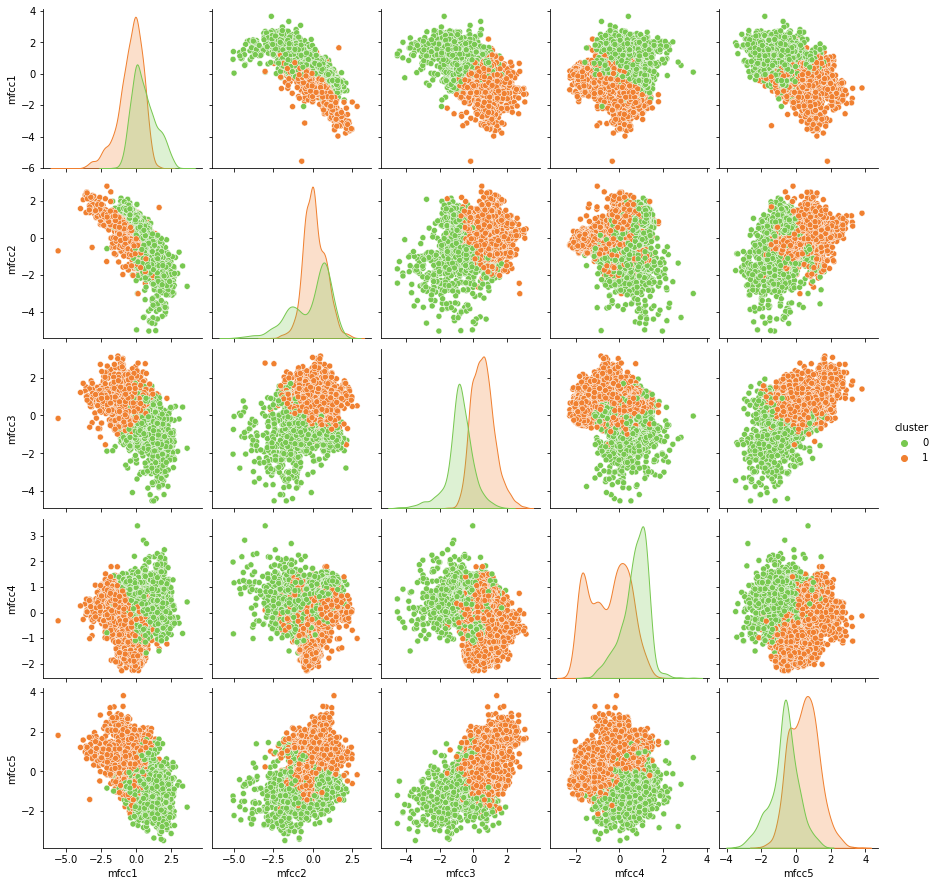

In [11]:
sns.pairplot(data_matrics_kmean, hue = 'cluster', palette=['#78C850', '#F08030'])

In [12]:
cluster_labels = np.where((cluster_labels == 1), 'valve_normal',cluster_labels)
cluster_labels = np.where((cluster_labels == 0), 'valve_abnormal',cluster_labels)
metrics.rand_score(dataset_class, cluster_labels)

/tmp/ipykernel_33825/1318521884.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  cluster_labels = np.where((cluster_labels == 0), 'valve_abnormal',cluster_labels)


0.509093785178142

### Spectral Clustering

In [13]:
from sklearn.cluster import SpectralClustering


In [14]:
SpecCluster= SpectralClustering(n_clusters=2, assign_labels='discretize')
SpecCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(SpecCluster.labels_, name='cluster')

In [15]:
cluster_labels.value_counts()

1    2789
0    1381
Name: cluster, dtype: int64

In [16]:
data_matrics_spec = data_matrics_normalized.join(cluster_labels.to_frame())

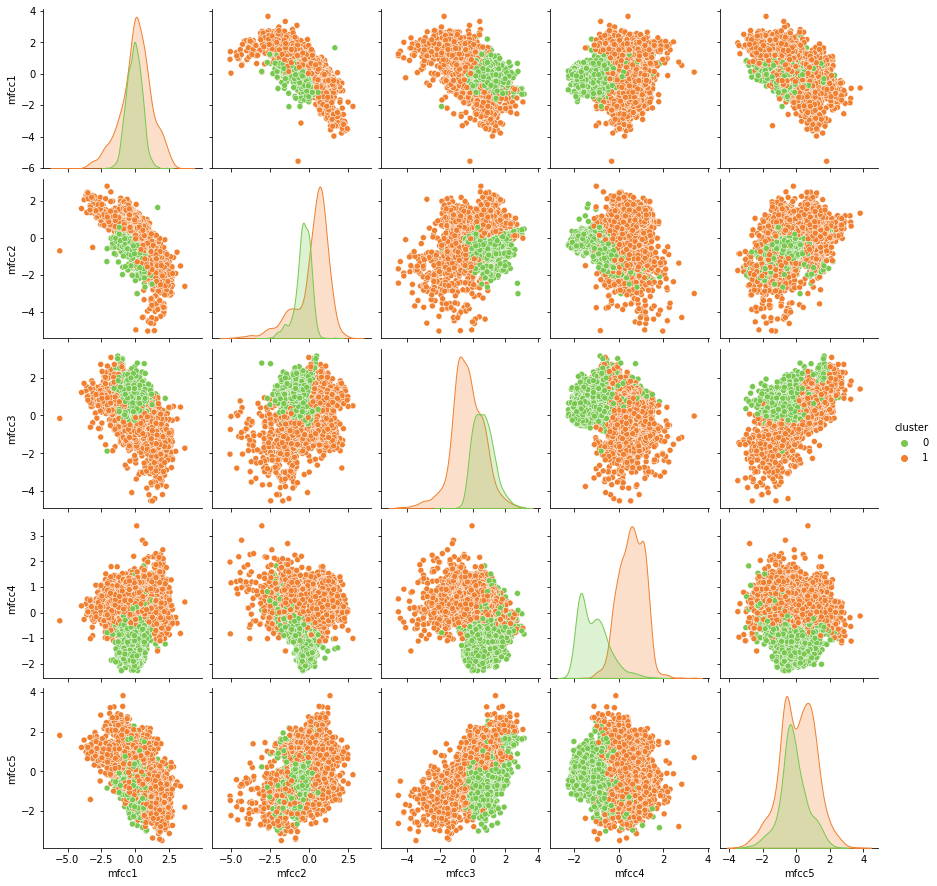

In [17]:
sns.pairplot(data_matrics_spec, hue = 'cluster', palette=['#78C850', '#F08030'])

In [18]:
cluster_labels = np.where((cluster_labels == 1), 'valve_normal',cluster_labels)
cluster_labels = np.where((cluster_labels == 0), 'valve_abnormal',cluster_labels)
metrics.rand_score(dataset_class, cluster_labels)

/tmp/ipykernel_33825/1318521884.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  cluster_labels = np.where((cluster_labels == 0), 'valve_abnormal',cluster_labels)


0.5318309804063681

### Hierarchical clustering with Agglomerative Clustering Algorithem

In [19]:
from sklearn.cluster import AgglomerativeClustering

AggCluster= AgglomerativeClustering(n_clusters=2)
AggCluster.fit(data_matrics_normalized)
cluster_labels = pd.Series(AggCluster.labels_, name='cluster')
data_metrics_AggCluster = data_matrics_normalized.join(cluster_labels.to_frame())

In [20]:
cluster_labels.value_counts()

0    3695
1     475
Name: cluster, dtype: int64

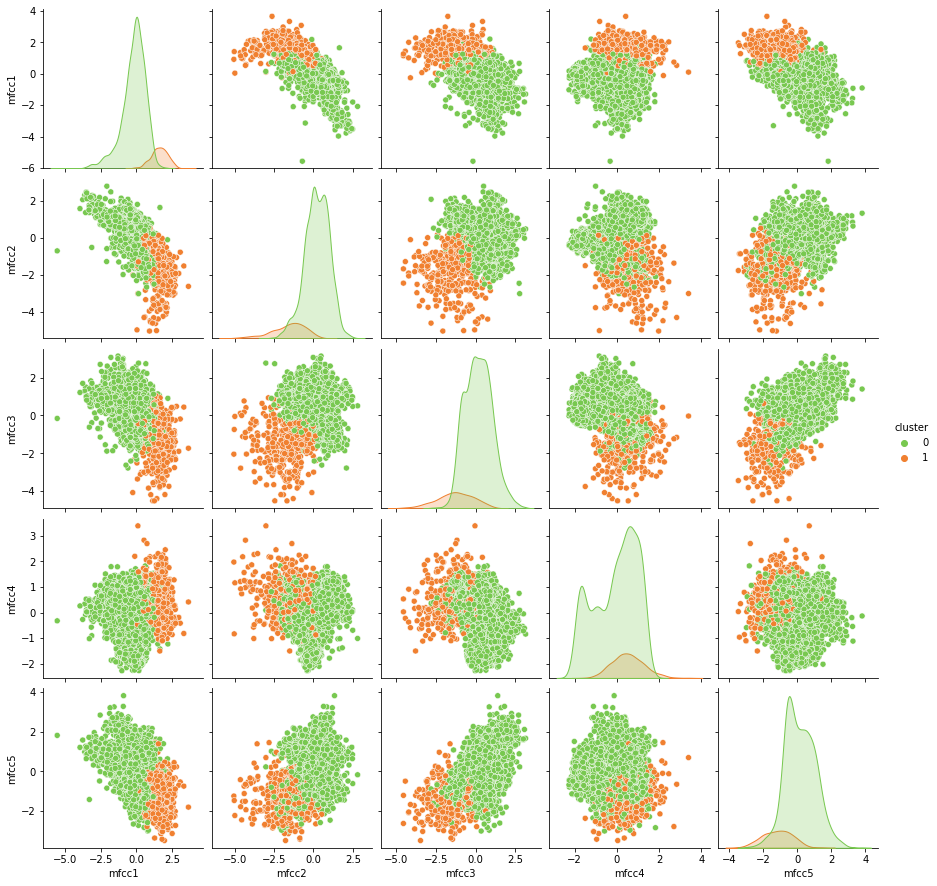

In [21]:
sns.pairplot(data_metrics_AggCluster, hue = 'cluster', palette=['#78C850', '#F08030'])

In [22]:
cluster_labels = np.where((cluster_labels == 0), 'valve_normal',cluster_labels)
cluster_labels = np.where((cluster_labels == 1), 'valve_abnormal',cluster_labels)
metrics.rand_score(dataset_class, cluster_labels)

/tmp/ipykernel_33825/2890699150.py:2: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  cluster_labels = np.where((cluster_labels == 1), 'valve_abnormal',cluster_labels)


0.6753472731529336

### Different Clustering Algorithm comparision with plot

<AxesSubplot:title={'center':'Agglomerative Clustering'}, xlabel='mfcc1', ylabel='mfcc5'>

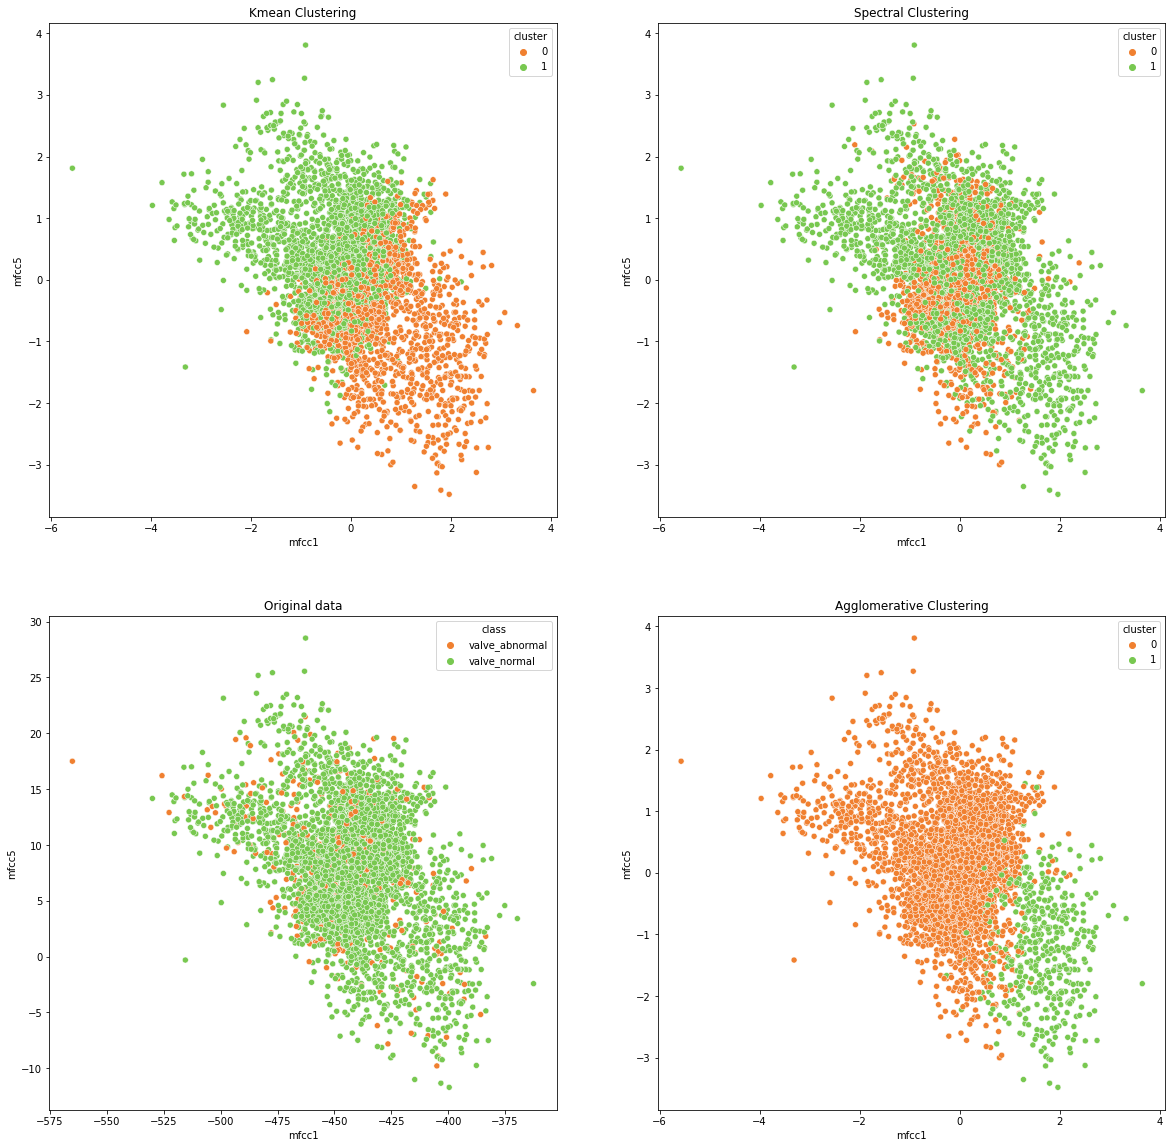

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(20, 20))
axes[0,0].title.set_text("Kmean Clustering")
axes[0,1].title.set_text("Spectral Clustering")
axes[1,0].title.set_text("Original data")
axes[1,1].title.set_text("Agglomerative Clustering")
sns.scatterplot(ax= axes[0,0], data=data_matrics_kmean, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[0,1], data=data_matrics_spec, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[1,0], data=dataset, x="mfcc1", y="mfcc5",hue = 'class', palette=['#F08030', '#78C850'])
sns.scatterplot(ax= axes[1,1], data=data_metrics_AggCluster, x="mfcc1", y="mfcc5",hue = 'cluster', palette=['#F08030', '#78C850'])

In [24]:
iner=[]
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, init='k-means++').fit(data_matrics_normalized)
    iner.append(kmeans.inertia_)
    cluster_labels = pd.Series(kmeans.labels_, name='cluster')

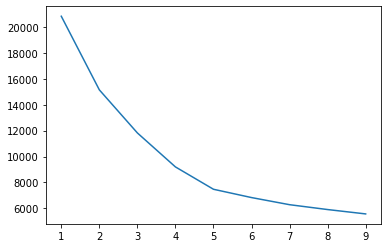

In [25]:
plt.plot(range(1,10), iner)
plt.show()